Code taken from: https://www.kaggle.com/rakend/simple-linear-regression-using-gradient-descent with small changes

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Load the data set
from sklearn.datasets import load_boston
boston_data = load_boston()
#print(boston_data['DESCR'])

If you print(boston_data['DESCR']) you get a description of the fields below.  RM is the number of rooms in the house and is the field we will focus on right now.

In [ ]:
boston_data['feature_names']
df = pd.DataFrame(data=boston_data['data'])

df.columns = boston_data['feature_names']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Price is the cost in thousands of dollars.

In [ ]:
df['Price'] =  boston_data['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


This is the reason we focus on RM. It is the highest positively correlated feature.  LSTAT actually is more correlated but negatively. (LSTAT is the social status of the people living in the houses.)

In [ ]:
corr = df.corr()
corr['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

This code does two things. First, it standardizes the values.  Also, it plots them after the standardization. 

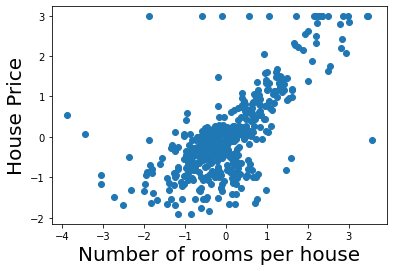

In [ ]:
x = df['RM']
y = df['Price']
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()
plt.scatter(x,y)
plt.xlabel('Number of rooms per house', size = 20)
plt.ylabel('House Price', size = 20)
plt.show()
#x

In [ ]:
x = np.c_[np.ones(x.shape[0]),x] #adds ones for the weights
# Parameters required for Gradient Descent
alpha = 0.01   #learning rate
m = y.size  #no. of samples
np.random.seed(10)  
theta = np.random.rand(2)  #initializing theta with some random values for slope and b
#x

Now the fun starts in batch.  Note that we are using MSE -- 1/(2*m) but the error is simply prediction - y.  Also, as we do things in Numpy the batch for the whole matrix is simply np.dot(error.T, error).

In [ ]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y          
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-7:   #checking if the change in cost function is less than 10^(-9)
            run = False
        
        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list
        

This might take a second, but now output the results!

In [ ]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]
print("Values of theta are {:2f} and {:2f}".format(theta[0], theta[1]))

Values of theta are 0.002314 and 0.693313


Visualizations of the slope convergence

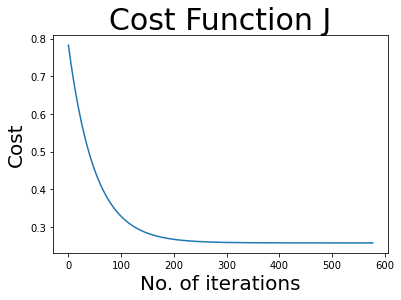

In [ ]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

Visualizations of the Impact of Values for Alpha

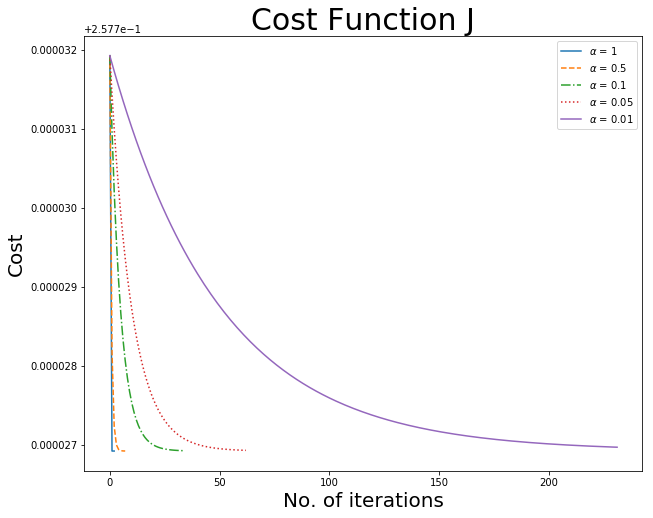